In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


#Aula 3 - PCA

Análise dos Compontes Principais - é um procedimento para reduzir a
dimensão do espaço de variáveis através da transformação dos dados de
modo a obter um conjunto de eixos ortogonais (não correlacionados)
que capturam grande parte da variabilidade original dos dados


O PCA idfentifica o eixo de representa a maior quanidade de variancia no conjunto de treinamento.


Motivação: PCA
* Muitos atributos podem ser correlacionados, o que não contribui
para a discriminação.
* Um número elevado de atributos pode levar à maldição da
dimensionalidade.
* A simplificação dos dados, sem perder informações importantes,
ajuda no processamento, pois reduz o tempo computacional e
complexidade de algoritmos.
* PCA permite transformar os dados de modo a eliminar redundâncias
e preservar informações importantes.


Passos do PCA

1. Centralizar os dados:
2. Calcular a matriz de covariância.
3. Calcular os autovalores e autovetores da matriz de covariância.
4. Ordenar os autovetores de acordo com o valor dos autovalores.
5. Obter os componentes: multiplicar os dados originais pelos
principais autovetores.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV file

data = pd.read_csv('/gdrive/MyDrive/MBA/data/iris.csv', header=(0))
#data = pd.read_csv('data/Vehicle.csv', header=(0))

classes = np.unique(data[data.columns[-1]])
print(data.shape)
list_labels = list(data.columns)
data.head(10)

data = data.to_numpy() #valido apenas para a versao do Pandas maior do que 0.24.0
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

(150, 5)


In [ ]:
from sklearn.decomposition import PCA
# seleciona os dois componentes principais
pca = PCA(n_components=2)
# calcula o PCA
pca_result = pca.fit_transform(X)

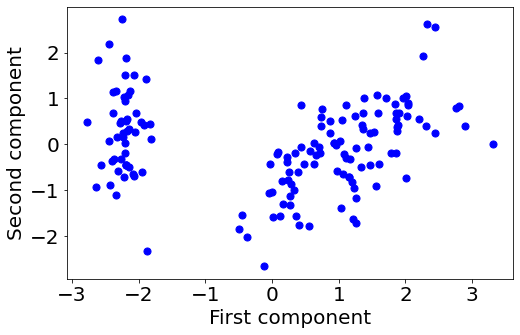

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(pca_result[:,0], pca_result[:,1], s=50, color = 'blue')
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

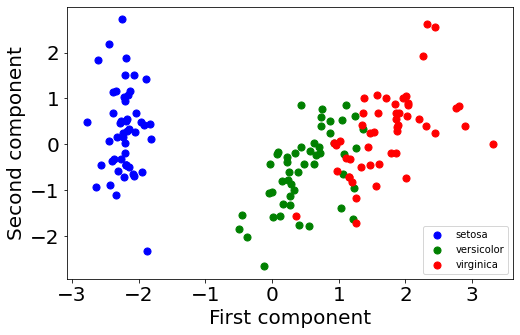

In [ ]:
# define as cores possíveis
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    nodes = np.where(y == c)
    # mostra os dados,considerando uma cor para cada classe
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

## N-Dims PCA

Para estimarmos o número de componentes para projetarmos os dados, podemos analisar como a variância muda de acordo com o número de componentes.

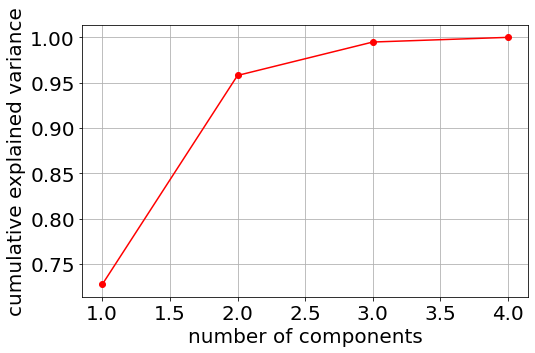

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
# mostra a variância acumulada
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
componetes = np.argmax(cumsum >= 0.95) +1

print('Quantidade de compontentes para ser >= a 95%: ',componetes)

Quantidade de compontentes para ser >= a 95%:  2


In [ ]:
#Quanto  % explica n primeiros eixos do PCA
n = 4
perc_exp = np.sum(pca.explained_variance_ratio_[0:n])
print('Porcentagem de informacao '+n+'' primeiras componentes principais: ',
      100*perc_exp,'%')

Ou seja, com 2 componentes podemos explicar  >95% da variancia nos dados

## Taxa de Variância Explicada

Taxa de variancia de cada componente principal disponivel. Ela indica a proporcao da variancia do conjunto de dados se encontra ao longo do eixo de cada componte princiapal

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

Ou seja, 72% da variancia esta sobre o primeiro eixo e 23% no segundo ...

## Compressão

Podemos comprimir os dados usando PCA, como feito anteriomente, mas após isso podemos descomprimir usando tecnica inversa.

Da iris, podemos voltar das 2 dimensoes para as 4:

In [ ]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X) # reduzindo
X_reduced[0] #duas dimensoes

array([-2.26454173,  0.5057039 ])

In [ ]:
x_recovered = pca.inverse_transform(X_reduced)
x_recovered[0]

array([-0.99464948,  1.06443573, -1.30560624, -1.24776881])

In [ ]:
#original
X[0]

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

# Aula 4 - Técnicas de Agrupamento de dados


Objetivo: Objetos semelhantes no mesmo grupo!

Menor distancia entre objetos iguais e maior distancia entre objetos diferentes.


## Tipos
*   K-means
*   Agrupamento Hierárquico
*   Avaliando Agrupamento

Encontrar os grupos de objetos tal que objetos no mesmo grupo serão
similares (ou relacionados) um ao outro e diferentes (ou não
relacionados) a objetos nos outros grupos.


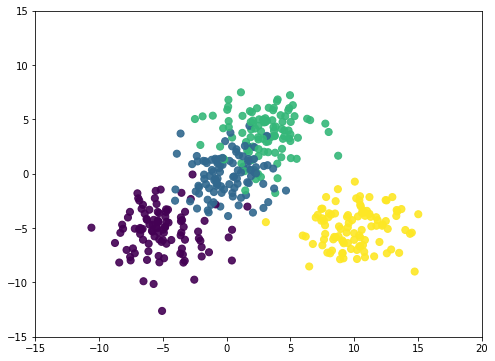

In [ ]:
#importa as bibliotecas básicas
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

c = [(-5, -5), (0, 0), (3, 4),(10,-5)]
n=400 #número de pontos
data = make_blobs(n_samples=n, n_features=2, centers=c, cluster_std=2, random_state=50)
X = data[0] # atributos das observacoes
labels = data[1] # classe conhecida inicialmente
# mostra os dados
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.xlim(-15,20)
plt.ylim(-15,15)
plt.show(True)

## K-means
K-means clustering represents an unsupervised algorithm

Amplamente usado, Simples e eficiente

Baseado na distancia euclidiana, com a interacao da centroid



---
Algoritmo:

Media da ditancia entre a centroid e os dados, vira a nova centroid, processo de interação até finalizar e a media for muito proxima a zero, ou um objetivo definido




Comparativo entre o cluster original e a clusterizacao por Kmeans

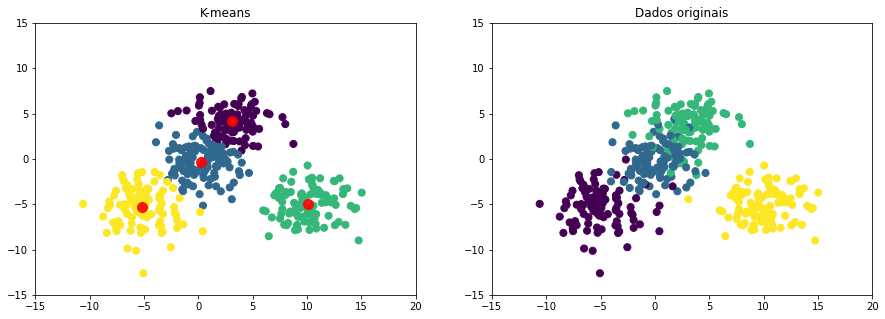

In [ ]:
from sklearn.cluster import KMeans

# numero de clusters a serem identificados inicialmente sem estudo de K
k = 4 

# define o método com k clusters:
kmeans = KMeans(n_clusters=k) 

# realiza o ajuste considerando os dados X
kmeans.fit(X)

# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)

# define o tamanha da figura
plt.figure(figsize=(15,5))

# mostra o primeiro gráfico
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(-15,20)
plt.ylim(-15,15)
plt.title('K-means')

centers = kmeans.cluster_centers_ # mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);
 
# mostra o segundo gráfico
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.xlim(-15,20)
plt.ylim(-15,15)
plt.title('Dados originais')
plt.show(True)

### Validacao:
**Importante rodar o algoritmo diversas vezes para obter resultados significativos, pois é sensivel a posicao inicial das seeds.**


Quantidade de K (clusters) utilizar o metodo de Elbow:

![elbow metodo](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/58_blog_image_8.png)

Podemos estimar o número ideal de clusters usando o método do cotovelo (elbow method). Esse método é usado para encontrar o melhor valor de k. Podemos usar a distância média dos pontos dentro de um cluster até o seu centróide (within-cluster sum of squares, WCSS) para diferentes valores de k.
$$
WCSS=\sum_{i=1}^{N_c} \sum_{\text{x}\in C_i} d(\text{x},\bar{x}_{C_i})
$$
onde $C_i$ é um grupo e $N_c$ é o número de grupos.

Aplicando metodo de cotovelo nos dados

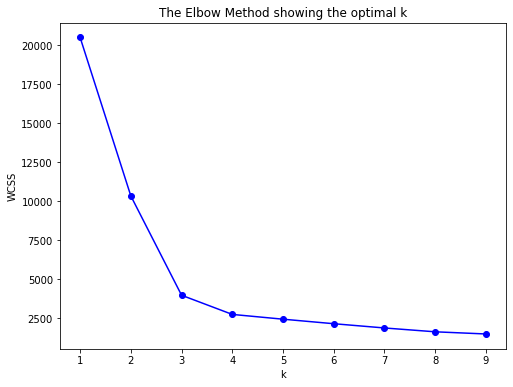

In [ ]:
WCSS= []
K = range(1,10)
# considerando diversos valores de k
for k in K: 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # calcula a medida e armazena em uma lista 
    WCSS.append(kmeans.inertia_)

# mostra os resultados
plt.figure(figsize=(8,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Limitações
Problemas quando cluster são:
1.  de diferentes tamanhos
2.  de diferentes densidades
3.  diferentes formatos - Nao gloubulares



## Agrupamento Hierárquico


---
Um algoritmo de agrupamento hierárquico gera uma estrutura
aninhada (árvore)


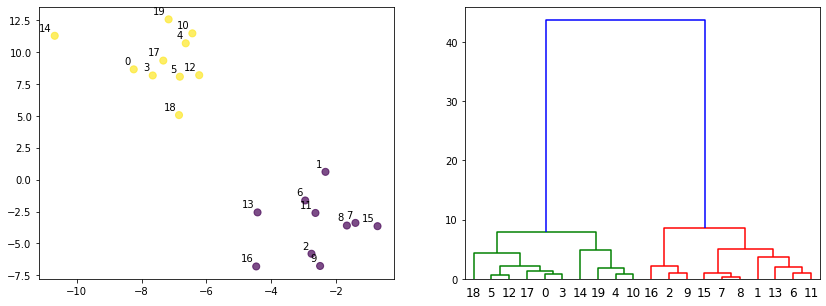

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(14,5))

n=20
data = make_blobs(n_samples=n, n_features=2, centers=2, cluster_std=2)
X = data[0]
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=data[1], s=50, alpha=0.7, label='True Position')

labels = range(0, n)  
for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(label,xy=(x, y), xytext=(-3, 3),textcoords='offset points', ha='right', va='bottom')

plt.subplot(1,2,2)
Z = linkage(X, 'ward')
dendrogram(Z)  
plt.show(True)

### Métodos

1. min
2. max
3. media
4. **ward'd (mais usado)**

Comparacao entre Kmeans e hierarquico para dados com formato nao globar

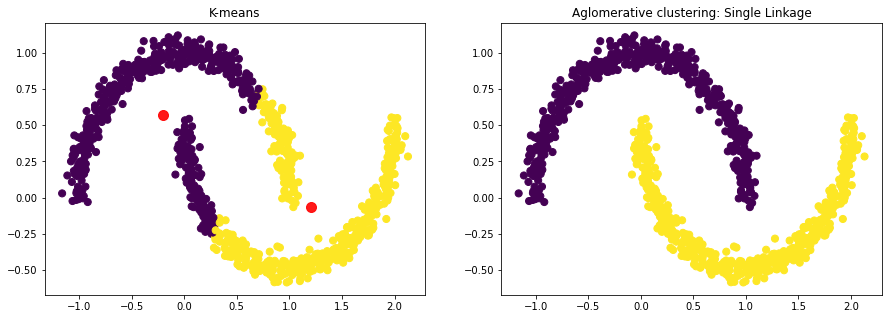

In [ ]:
from sklearn import cluster, datasets
from sklearn.cluster import KMeans

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]

plt.figure(figsize=(15,5))

k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
plt.subplot(1,2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('K-means')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9);

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
y_hr = clustering.fit_predict(X)
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=y_hr, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Single Linkage')
plt.show(True)

## Avaliação de clusterizacao

Quão significativo é o agrupamento?


---



A avaliação de um agrupamento pode ser usada:
1. Para evitar encontrar padrões em ruidos
2. Para comparar diferentes metodos de agrupamento
3. Para comparar clusters


---






In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score, mutual_info_score
from sklearn.metrics import silhouette_score

print('K-means:')
print('Adjusted rand score:', adjusted_rand_score(y_km, data[1])) #mais proximo de 1 melhor
print('Mutual information score:', mutual_info_score(y_km, data[1]))
print('Silhouette score:', silhouette_score(X, y_km, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - single linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr, data[1]))
print('Mutual information score:', mutual_info_score(y_hr, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr, metric='euclidean'))

K-means:
Adjusted rand score: 0.4468902179347121
Mutual information score: 1.1243801698879505
Silhouette score: 0.3511417709475896


Agrupamento hierárquico - single linkage:
Adjusted rand score: 0.47030018510056987
Mutual information score: 1.12569581851062
Silhouette score: 0.3305002476196171


Validar K para cada score criado acima

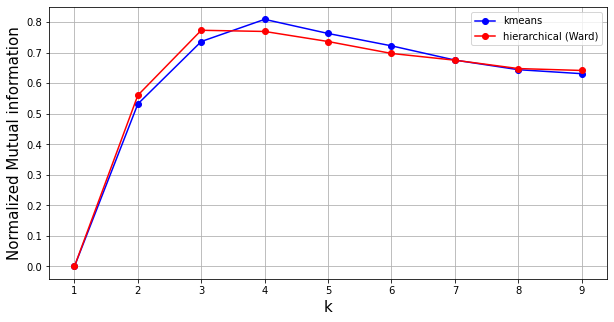

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets

NMI_km = []
NMI_hr = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))
    clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
    y_hr = clustering.fit_predict(X)
    NMI_hr.append(normalized_mutual_info_score(y_hr, data[1], average_method='arithmetic'))
plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.plot(K, NMI_hr, '-ro', label = 'hierarchical (Ward)')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

### Avaliar agrupamentos são usadas em três casos:



#### Índice externo
Usado quando os rótulos dos objetos são
conhecidos e queremos avaliar se os clusters correspondem aos
grupos originais.

Exemplo: Medidas de entropia.

#### Índice interno: 
Usado para avaliar um agrupamento sem usar
informações externas.
a. Exemplo: Soma do erro quadrático

possui dois indicadores:
1. Coesão
    é a distancia media dos pontos dentro de um cluster até sua centroid, quando **menor** melhor

2. Se paração 
    soma das distancias ao quadrado entre os pontos de diferentes cluster, **maior** melhor

#### Índice relativo:
Usado para comprar agrupamentos ou grupos.

Exemplo: Índices internos ou externos são usados para esse
fim.

#### Purity (Pureza):
mede o quão “puro" é cada cluster. preciso saber dos dados originais para valdiacao do modelo. 
dado em %.

# Aula 5 - Modelos de regressão

## Regressão Linear



---
Dado um conjunto de variáveis, como podemos prever o valor de outra variável?
<br />
No processo de regressão, temos um conjunto de atributos que serão usados para prever uma variável de saída.
<br />
<br />
<b> Podem ser usado para duas TAREFAS: </b>
1. Prever dado desconhecido a partir do modelo treinado
2. Determinar a importancia de cada variavél independente na previsão

Vimos que para a regressão linear simples, temos o modelo: $Y \approx \beta_0 + \beta_1 X$
<br />

![regressao linear](https://qualityway.files.wordpress.com/2020/06/regresso-linear-i-21-638.jpg?w=638&h=450&crop=1)


<br />


### Algoritimos

0. Eq Normal
1. Métodos dos minimos quadrados
2. GD Lote
3. GD Estocastico
4. GD Minilote

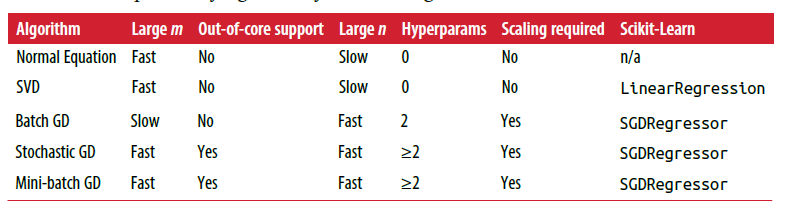

Nota.: Quase nao há diferenca no resultado, todos estes algoritimos resultam na mesma resposta e fazem previsões semelhantes.

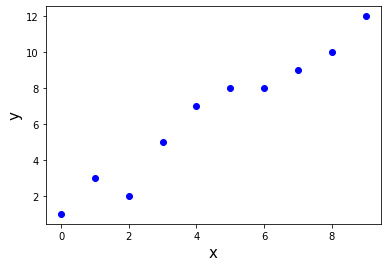

In [ ]:
# Exemplo de aula
import matplotlib.pyplot as plt
import numpy as np


# define os dados
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
plt.plot(x, y, 'bo')
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.show(True)

Estimando os coeficiente através do método dos mínimos quadrados, obtemos:
    $
    \begin{cases}
    \hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\sigma_{xy}}{\sigma_{xx}}\\
    \hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
    \end{cases}
    

In [ ]:
from statistics import variance 
import math 


#calcula o beta 1 e beta 2 da equacao
def linear_regression(x, y): 
    # número de observações/pontos
    n = np.size(x) 
  
    # médias de x e y
    m_x, m_y = np.mean(x), np.mean(y) 
    SS_xy = 0
    SS_xx = 0
    for i in range(0,len(x)):
        SS_xy = SS_xy + (x[i]-m_x)*(y[i]-m_y)
        SS_xx = SS_xx + (x[i]-m_x)**2
  
    # calcula os coeficientes de regressão
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return (b_0, b_1) 

# função para mostrar os dados e o ajuste linear
def plot_regression_line(x, y, b): 
    # mostra os dados
    plt.scatter(x, y, color = "b", marker = "o", s = 50) 
  
    # prediz os valores
    y_pred = b[0] + b[1]*x 
  
    # mostra a reta de regressão
    plt.plot(x, y_pred, color = "r") 
  
    plt.xlabel('x', fontsize = 15) 
    plt.ylabel('y', fontsize = 15) 
    plt.show(True) 

Estimated coefficients:
b_0 = [1.23636364]  
b_1 = [1.16969697]


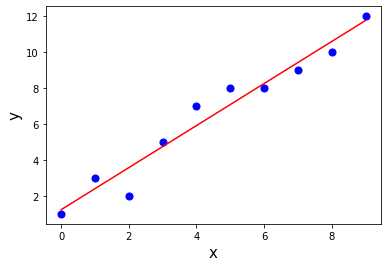

In [ ]:
# estima os coeficientes
b = linear_regression(x, y) 
print("Estimated coefficients:\nb_0 = {}  \nb_1 = {}".format(b[0], b[1])) 
  
# mostra o ajuste linear
plot_regression_line(x, y, b) 

Regressâo linar por sklearn:

In [ ]:
#seguindo o livro maos a obra com sklearn.
from sklearn.linear_model import  LinearRegression

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(10,1)
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]).reshape(10,1)

lin_reg = LinearRegression()
lin_reg.fit(list(x),list(y))
lin_reg.intercept_, lin_reg.coef_

(array([1.23636364]), array([[1.16969697]]))

### RSE


---
Para quantificar a acurácia do modelo, usamos o erro padrão residual (RSE).

![equacao RSE](https://i.stack.imgur.com/P3S4z.png)

Essa medida fornace o **erro absoluto**, medido em unidades de Y




<font color='red'>Quanto maior o valor de RSE pior o modelo</font>


[0,+inf[

In [ ]:
#funcao que calcula o RSE
def RSE(x,y,b):
    n = len(y)
    RSE = 0
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        RSE = RSE + (y[i]-y_pred)**2
    RSE = math.sqrt(RSE/(n-2))
    return RSE

    
print('RSE:', RSE(x,y,b))



RSE: 0.8384690232980003


### R<sup>2</sup>

---




Alternativa:
R<sup>2</sup>, que mede a proporção da variabilidade em Y que pode ser explicada a partir de X. 0=<R<sup>2</sup>=<1

<br />
Valores de *R2 próximo de 1* indicam que uma grande proporção da variabilidade dos dados são explicadas pelo modelo de regressão.
<br /><br />
Valores de R2 próximo de zero indicam que o modelo não explica muito da variabilidade, podendo ser que os dados não seguem uma relação linear ou erro é muito grande.

In [ ]:
def R2(x,y,b):
    n = len(y)
    c1 = 0
    c2 = 0
    ym = np.mean(y)
    for i in range(0,n):
        y_pred = b[0]+ x[i]*b[1] # valor predito
        c1 = c1 + (y[i]-y_pred)**2
        c2 = c2 + (y[i]-ym)**2
    R2 = 1 - c1/c2
    return R2

print('R2:', R2(x,y,b))

R2: 0.952538038613988


### Variaveis nao Linear


---
Notem que o modelo não precisa ter termos lineares em X, mas apenas nos parâmetros. Por exemplo, modelo abaixo ainda é linear nos parâmetros: $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$



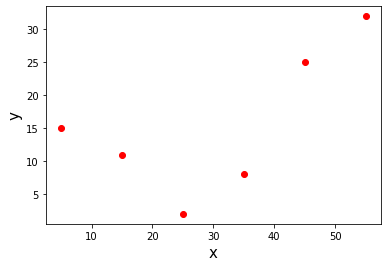

Dados originais:
 [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
Novos dados:
 [[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]
21.372321428571436 [-1.32357143  0.02839286]


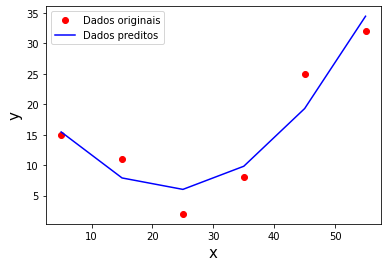

R2: 0.8908516262498563


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([15, 11, 2, 8, 25, 32])

plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

from sklearn.preprocessing import PolynomialFeatures

# define a transformação nos dados
transformer = PolynomialFeatures(degree=2, include_bias=False) # degree é o grau que se deseja identificar os dados, aumento gera OVERFITTING
x = x.reshape((-1, 1))
transformer.fit(x)
print('Dados originais:\n', x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(x)
print('Novos dados:\n', x_)
model = LinearRegression().fit(x_, y)
print(model.intercept_, model.coef_)
y_pred = model.predict(x_)

plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'b-', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.legend()
plt.show(True)


from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)

## Regressão Linear Múltipla

Quando estamos interessados na influencia de varias variaveis em uma variavel alvo.

![equacao regressao linear multipla](https://slideplayer.com.br/slide/359535/2/images/4/Modelo+O+modelo+de+Regress%C3%A3o+Linear+M%C3%BAltipla+%C3%A9+representado+pela+equa%C3%A7%C3%A3o%3A+As+constantes%3A+%EF%81%A20%2C+%EF%81%A21%2C+%EF%81%A22%2C+...%2C%EF%81%A2k%2C+s%C3%A3o+os+par%C3%A2metros+populacionais..jpg)

Ps.: O modelo não precisa ter termos lineares em X, mas apenas nos parametros.
E por isso é um modelo LINEAR.

explo de predicao usando sklearn bostonhouse

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# le os dados
data = pd.read_csv('/gdrive/MyDrive/MBA/data/BostonHousing.csv', header=(0))
# valor a ser predito
ylabel = data.columns[-1]
print("Número de linhas e colunas:", data.shape)
data.head(10)

Número de linhas e colunas: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [ ]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

In [ ]:
from sklearn.model_selection import train_test_split
# divide o conjunto em treinamento e teste
p = 0.3 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

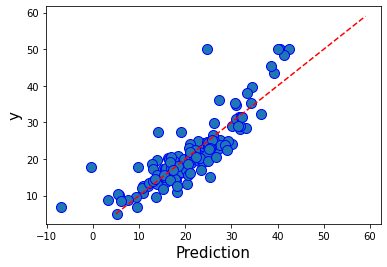

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
#fig.savefig('regression-LR.jpg')

# y é o valor de teste e prediction é o valor predido, o ideal é a linha verlmelha

Calculo do R<sup>2</sup>

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7112260057484923


## Simplicando Modelo via Regularização

Nos modelos de regressão, pode ocorrer overfitting, assim para evitar é usado a **REGULARIZAÇÃO**


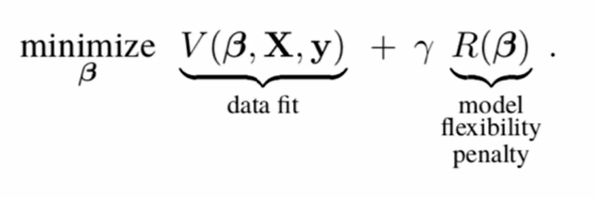

1. Temos um termo que descreve o quao bem o modelo se ajusta aos dados
2. um termo uqe penaliza a complexidade do modelo.
3. A regularizacao é obtida através de um balanço entre esses dois termos

<br />
<br />
Método mais popular é *Ridge Regression* (Tikhonov regularization) 
possui um termo que pensaliza e diminui, reduzindo o super ajuste.

![regularização](https://mahaveer0suthar.github.io/mahaveer0suthar.github.io/images/tutorials/regularization/reg_graph.png)

Em verde o modelo em Overfiting, e em azul pós processo de regularizacao



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# leitura dos dados
data = pd.read_csv('/gdrive/MyDrive/MBA/data/Advertising.csv', header=(0))
# remove nan (Not a Number)
data = data.dropna()
data = data.drop(data.columns[[0]], axis=1) # remove the first column (if useless)
# define a variável de saída
ylabel = data.columns[-1]

print('Número de observações e atributos:',data.shape)
list_labels = list(data.columns)
data.head(10)

Número de observações e atributos: (200, 4)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
# Converte os dados para numpy para facilitar a manipulação
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 3.796797236715213


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.860946650823037


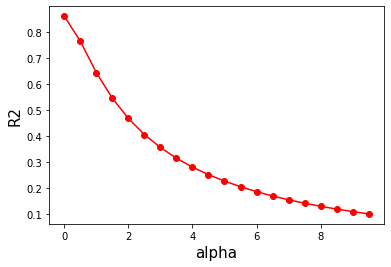

In [ ]:
vR2 = []
valpha = []
# variamos os valaores de alpha
for alpha in np.arange(0,10,0.5):
    ridge2 = Ridge(alpha = alpha, normalize = True)
    ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

exemplo o melhor R<sup>2</sup> é para alpha = 0 

## *Least Absolute Shrinkage and Selection Operator* (**LASSO**)

Notem que os resultados obtidos por ridge regression e Lasso são
diferentes.
Enquanto ridge regression mantém os valores dos parâmetros pequenos, LASSO tende a selecionar alguns valores para serem
diferentes de zero, enquanto que outros são exatamente iguais a zero.
Assim, LASSO pode ser usado para selecionar atributos

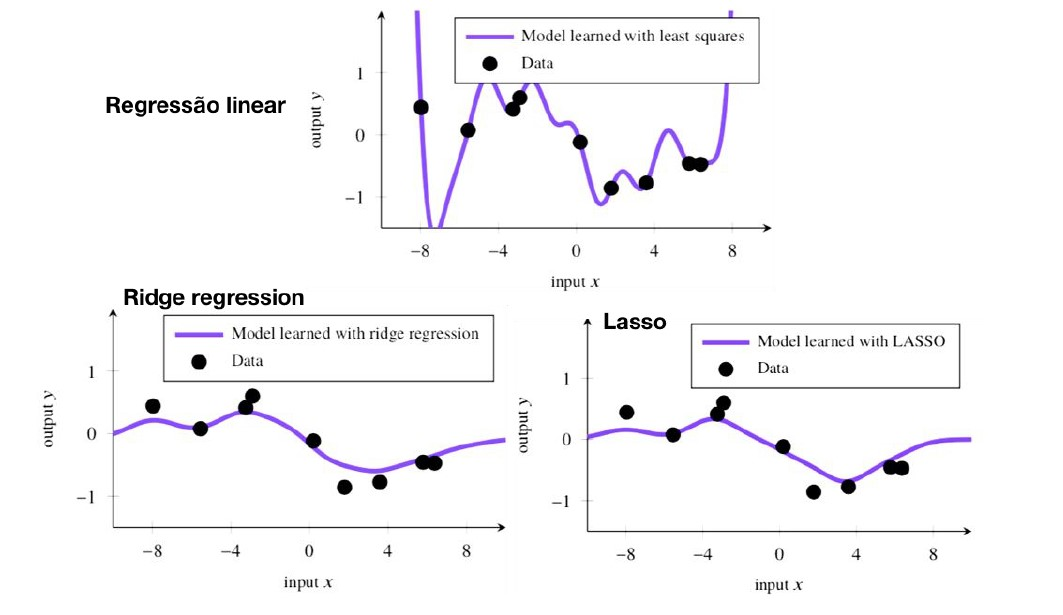

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1
# notice that we need to normalize the attributes: normalize = True
lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)         # Calculate the test MSE
print('RSME:', RSME)

RSME: 6.064528083772852


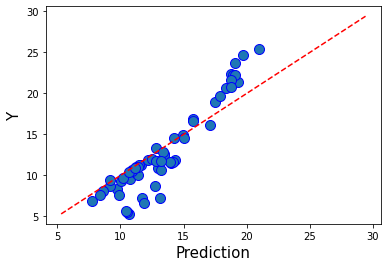

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

#plt.grid(True)
plt.show(True)

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2:", R2)          # Calculate the test MSE

R2: 0.7778936064660812


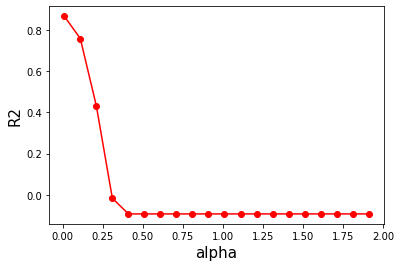

In [ ]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha, normalize = True)
    lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

O lasso zera valores de *BETA* que ele identifca como nao importante.
nesse caso o terceiro coeficente (beta) que é o newspaper nao contribui para a predicao das vendas.

In [ ]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
print('Coeficientes: TV, radio, newspaper')
lasso.coef_

Coeficientes: TV, radio, newspaper


array([0.03079952, 0.12648918, 0.        ])

# Aula 6 Classificação

1. K-vizinho mais proximo
2. Regressão Logistica
3. Naive Bayes



In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(100) # define the seed (important to reproduce the results)

data = pd.read_csv('/gdrive/MyDrive/MBA/data/vertebralcolumn-3C.csv', header=(0))
#data = pd.read_csv('data/winequality-red.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(data.columns)

#dados separacao em X e Y
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Matriz de atributos: Número de linhas: 310  colunas:  7


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

## K-vizinho mais proximo

Utiliza a distancia para idenficar.

Metricas:



*   Euclidiana [0, inf)
*   Minkowski [0, inf)
*   Cosseno [0.1]
* Pearson [-1, 1]



Propriedades:

* O algoritmo não “aprende” um modelo, apenas memoriza objetos de treinamento

* Adia computação para a fase de classificação
* O algoritmo pode ser entendido como não paramétrico, ependendo apenas do número de vizinhos k.
* É um classificador não-linear, não sendo restrito a regiões de separação lineares
* Como geralmente a distância Euclidiana é considerada, é necessário normalizar ou padronizar os dados
* Dado que o conjunto de treinamento seja relativamente grande, pode-se provar que o
erro cometido na classificação é no máximo duas vezes maior do que o classificador Bayesiano, que é ótimo.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.7580645161290323


Inputs of KNeighborsClassifier


weights:  distance/ uniform <br />
algorithm: ball_tree/kd_tree/brute/auto<br />
metric: euclidean/manhattan/chebyshev/minkowski/wminkowski/seuclidean/mahalanobis

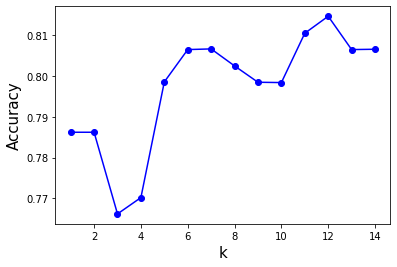

Melhor k: 12
Accuracy: 0.8225806451612904


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 15):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean',
                                  weights='distance', algorithm='auto')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)
#accuracy
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

In [ ]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.8225806451612904


### Regiao de decisao


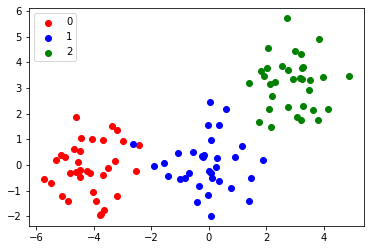

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


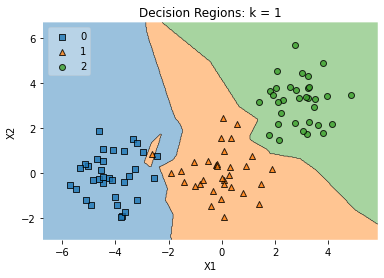

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


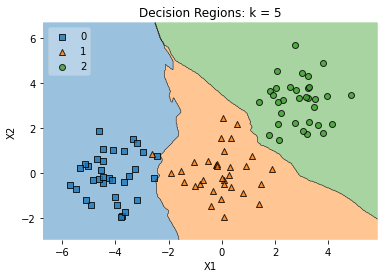

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


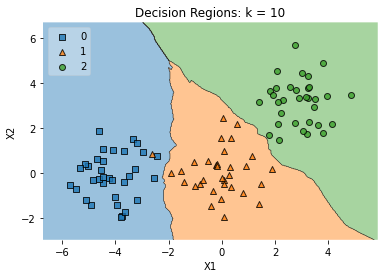

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


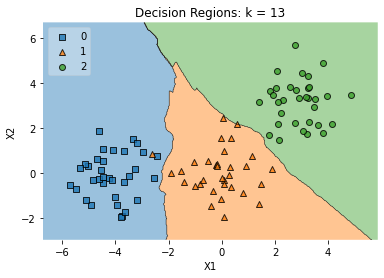

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(-4, 0), (0, 0), (3, 3)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# mostra as regiões de separação para diversos valores de k
vk = [1,5,10,13]
for k in vk:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = '+str(k))
    plt.show()

## Regressão Logistica

Retorna valor entre [0,1]


![regressao logistica](https://pcodinomebzero.neocities.org/Imagens/logistica.png)


Parametros <br />
solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’},

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.8709677419354839


### Regiao de decisao

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


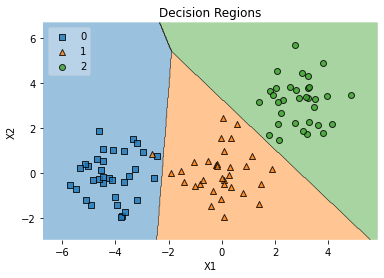

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Training a classifier
model = LogisticRegression(solver = 'saga', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

## Naive Bayes




Propriedades:

* Apesar da limitação em assumir independência dos atributos, o classificador Naive Bayes é robusto e apresenta boa performance para muitos dados reais.
* Todas as probabilidades exigidas podem ser calculadas dos dados de treinamento em uma passagem.
* Construção do modelo é bastante eficiente.
* Fácil de estender para incremental.
* Robusto a ruídos e atributos irrelevantes


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.8064516129032258


### Região de decisão

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


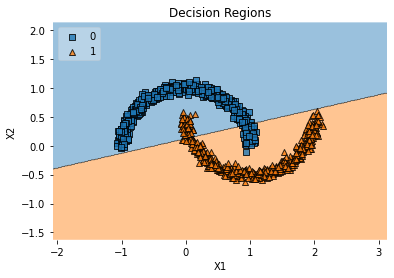

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Training a classifier
model = GaussianNB()
model.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

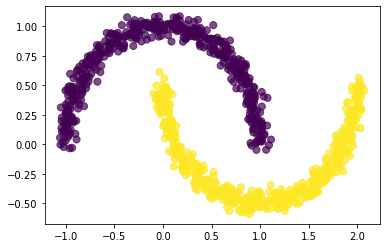

Accuracy (knn10): 	1.000
Accuracy (gaussianNB): 	0.885
Accuracy (logreg): 	0.895


In [ ]:
# Do exercicio:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

models = [
    ('knn10', KNeighborsClassifier(10, metric = 'euclidean')),
    ('gaussianNB', GaussianNB()),
    ('logreg', LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000))
]

from sklearn import datasets
plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show()

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = .2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

for name, model in models:
    model.fit(X_train, y_train)
    print('Accuracy ({}): \t{:.3f}'.format(name, model.score(X_test, y_test)))

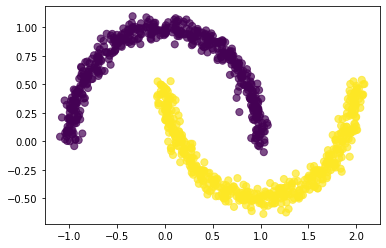

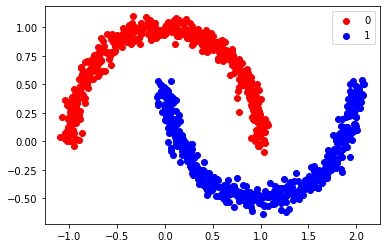

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


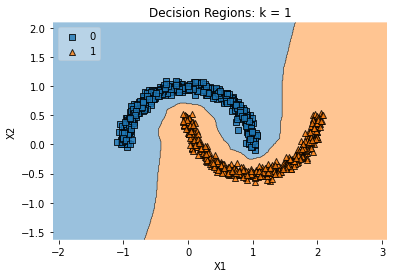

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


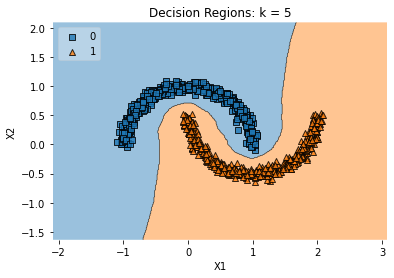

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


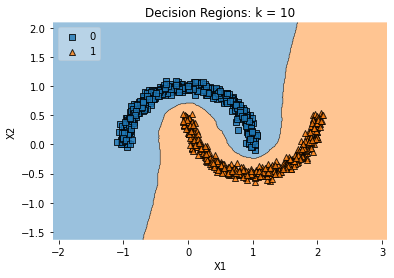

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


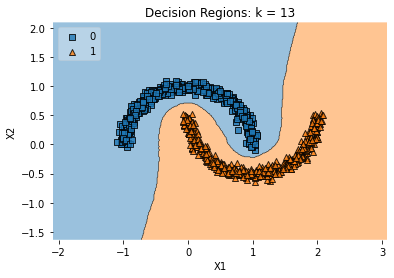

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


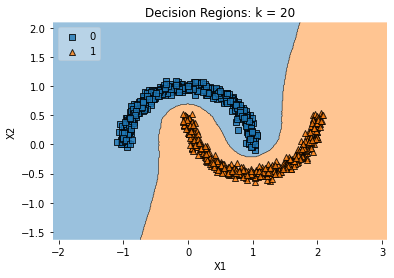

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


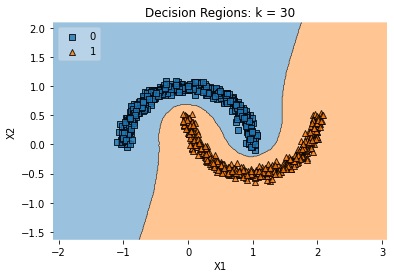

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# Gera os dados em duas dimensões
n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# mostra as regiões de separação para diversos valores de k
vk = [1,5,10,13,20,30]
for k in vk:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = '+str(k))
    plt.show()

# Aula 7 - Classificação: árvores e avaliação

* Árvores de Decisão
* Avaliação de modelos

* Florestas Aleatórias

## Árvores de Decisão

### Classificação

* Métodos baseados em árvores dividem o espaço de atributos em regiões.
* Árvores podem ser usadas em problemas de classificação e regressão.




Cada Nó corresponde a uma região no espaço de entradas.


Uma das muitas qualidades das Arvores de Decisao é que elas exigem pouca preparação de dados. em particular, elas nao exigem o **escalonamento ou a centralização das caracteristicas**.


In [ ]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

     |████████████████████████████████| 51kB 2.6MB/s 


In [ ]:
#exemplo Livro

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data#[:,2:] #comprimento e largura das petalas
y = iris.target


from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)



tree_clf = DecisionTreeClassifier(criterion = 'gini', random_state = 101, max_depth=None) #criterion{"gini", "entropy"}, default="gini"

tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [ ]:

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Vizualização da arvore de decisão

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


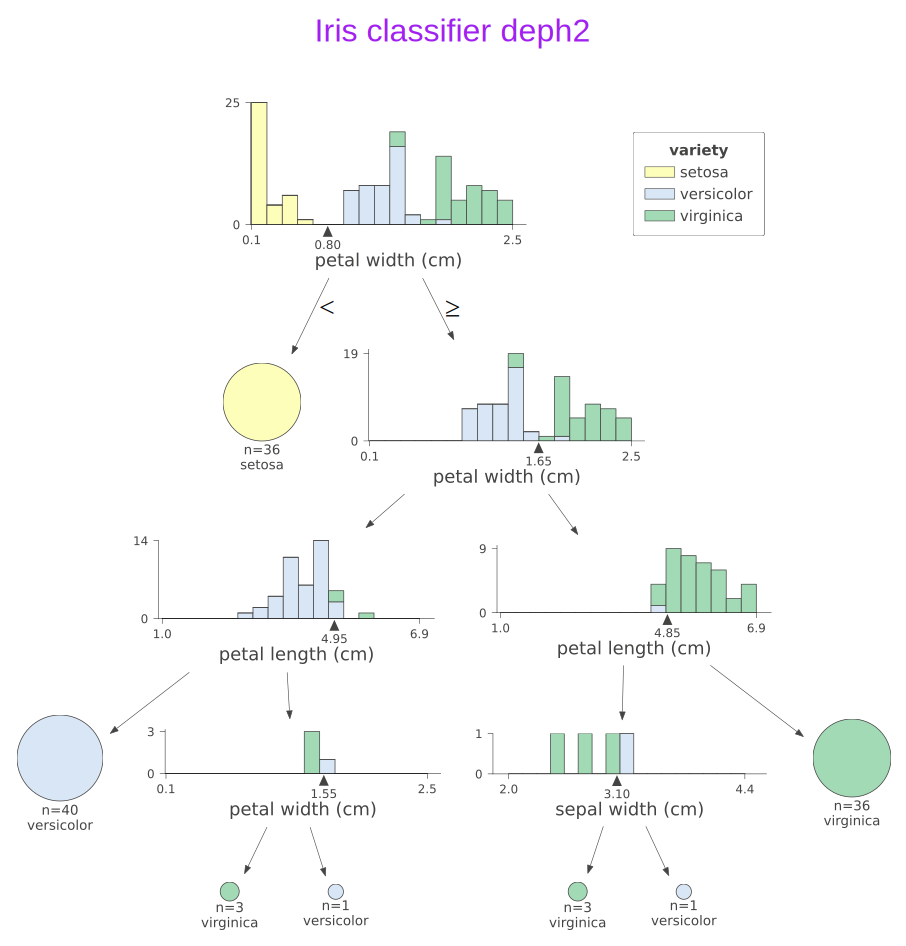

In [ ]:

from sklearn.tree import export_graphviz

from IPython.display import Image, display_svg, SVG
from dtreeviz.trees import *

viz = dtreeviz(tree_clf,
               x_train,
               y_train,
               target_name='variety',  # this name will be displayed at the leaf node
               feature_names=iris.feature_names,               
               title="Iris classifier deph2",
               class_names=["setosa", "versicolor", "virginica"], 
               title_fontsize=16,
               colors = {"title":"purple"},
               #orientation='LR',
               scale=2,               
              )
viz  
#viz.view() #will give give a popup with graph in pdf

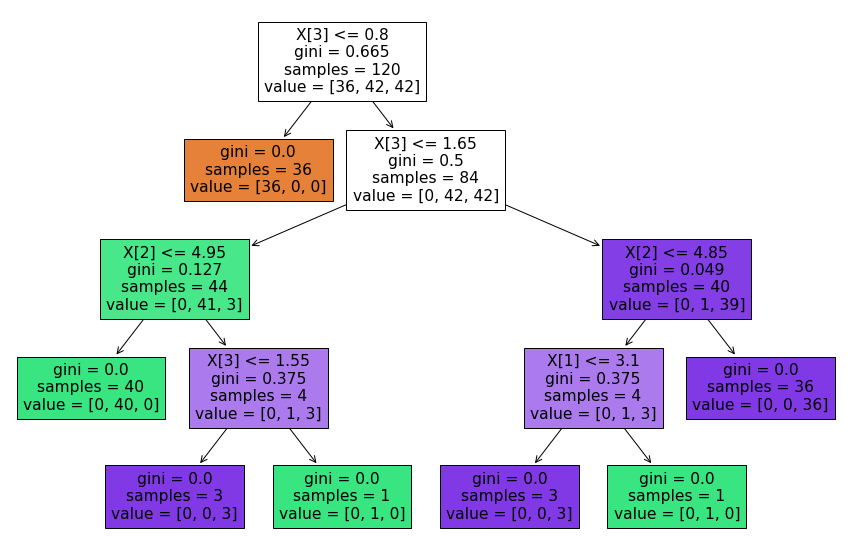

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clf,filled=True)
plt.show(True)

In [ ]:
y_pred_decision = tree_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred_decision, y_test)
print('Accuracy:', score)

Accuracy: 0.9333333333333333


### Regressao

exemplo livro pg 179

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#funciona semelhante ao classifier porem tenta reduzir o MSE

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Algoritmos

* Algoritmo de Hunt (usado no Sklearn)
* CART
* ID3, C4.5
* SLIQ, SPRINT


Estratégia gulosa
1. Sucertivel a entorar ótmo local
2. Permite construcao de arvore em tempo linear (reduzindo o problema NP-completo)

* Issola a classe com menor grau de impureza primeiro

### Métricas

Não posso comparar ENTROPIA com GINI pois tem escalas diferentes



* Gini 0 a 0.5
* Entropia 0 a 1
* Erro na classificação 0 a 0.5
 

Gini ou Entropia, As duas medidas mede a impureza, sendo 0 o valor mais puro, em geral retornam ao mesmo resultado. Gini tenta isolar a classe mais frequente em seu proprio ramo, euqnato a entropia tende a produzir árvores ligeramente mais equilibradas.

### Acuracia

In [ ]:
from sklearn.metrics import accuracy_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
tree_reg = DecisionTreeRegressor()
tree_reg.fit(trainX,trainy)

y_pred = tree_reg.predict(testX) 

score = accuracy_score(y_pred, testy)
print('Accuracy:', score)

Accuracy: 0.778


### Propriedades


* Simples entendimento e interpretação: modelo “caixa branca”.
* Não requer normalização dos dados.
* Pode ser usada com dados numéricos e categóricos ao mesmo
tempo.
* É um método robusto a outliers.
* Pode ser usado em grandes bancos de dados.
* É um método não-paramétrico.

## Florestas Aleatórias

Utiliza amostragem dos dados para produzir diversas arvores.

A amostragem dos atributos permite que as arvores geradas não sejam dominadas por um atributo com alto poder de discriminação

In [ ]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'/gdrive/MyDrive/MBA/data/Vehicle.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns[0:-2])

Número de linhas e colunas na matriz de atributos: (846, 19)


In [ ]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

array([[94, 43, 69, ..., 11, 193, 198],
       [88, 39, 76, ..., 6, 201, 209],
       [89, 44, 82, ..., 14, 188, 193],
       ...,
       [102, 54, 98, ..., 17, 186, 196],
       [109, 49, 103, ..., 21, 192, 201],
       [82, 45, 68, ..., 1, 181, 184]], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
                                  max_depth=None, max_features='auto', max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=1, min_samples_split=2,
                                  min_weight_fraction_leaf=0.0, n_jobs=1,
                                  oob_score=False, random_state=None, verbose=0,
                                  warm_start=False)
rnd_clf.fit(x_train,y_train)
y_pred_100 = rnd_clf.predict(x_test) 
score_100 = accuracy_score(y_pred_100, y_test)
print('Accuracy:', score_100)

Accuracy: 0.7588235294117647


Number of Estimators: 1 Accuracy: 0.6
Number of Estimators: 11 Accuracy: 0.7411764705882353
Number of Estimators: 21 Accuracy: 0.7176470588235294
Number of Estimators: 31 Accuracy: 0.7588235294117647
Number of Estimators: 41 Accuracy: 0.7705882352941177
Number of Estimators: 51 Accuracy: 0.7823529411764706
Number of Estimators: 61 Accuracy: 0.7823529411764706
Number of Estimators: 71 Accuracy: 0.7764705882352941
Number of Estimators: 81 Accuracy: 0.7705882352941177
Number of Estimators: 91 Accuracy: 0.7764705882352941
Number of Estimators: 101 Accuracy: 0.7588235294117647
Number of Estimators: 111 Accuracy: 0.7647058823529411
Number of Estimators: 121 Accuracy: 0.7647058823529411
Number of Estimators: 131 Accuracy: 0.7764705882352941
Number of Estimators: 141 Accuracy: 0.7529411764705882
Melhor n: 51  com acurácia: 0.7823529411764706


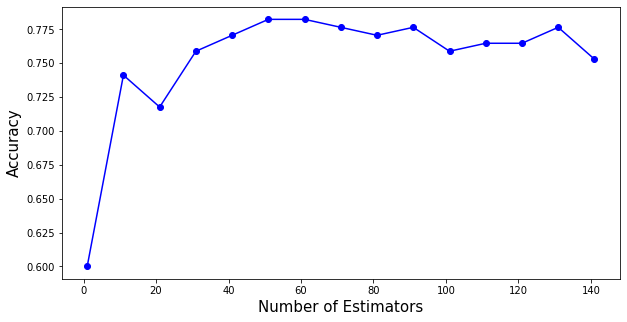

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

vscore = []
vn = []
for n in range(1,150,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

### importancia de cada caracteristica 


Seguindo a metodologia Florestas Aleatorioas

Soma de cada atributo = 1


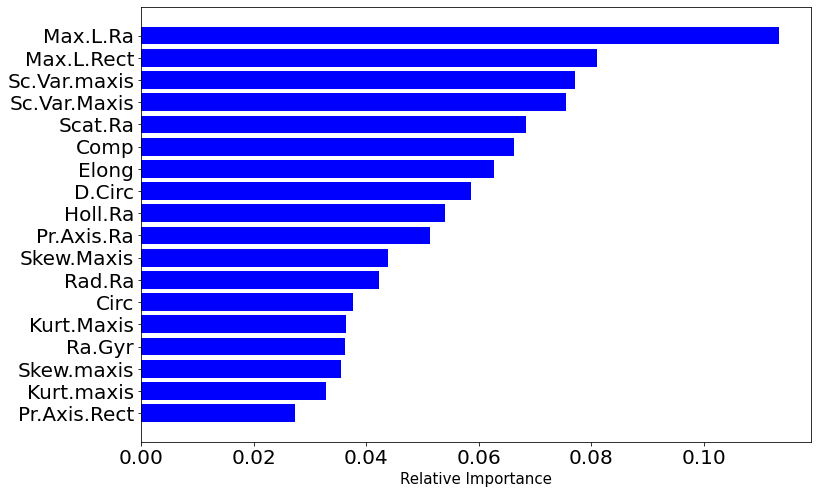

In [ ]:
importances = model.feature_importances_ #ou usar rnd_clf primeiro modelo criado.
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

### Plotango regioes

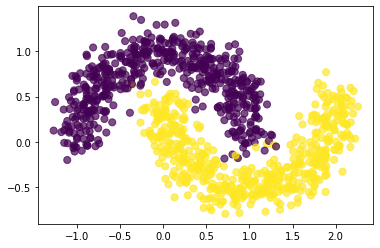

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Random Forest')

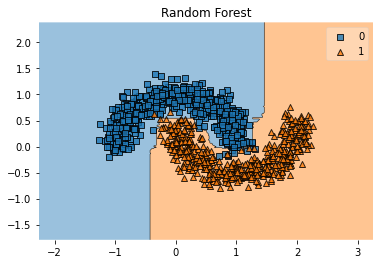

In [ ]:
from sklearn import datasets
plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.15)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)


trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(trainX,trainy)


pred_y = rnd_clf.predict(testX)

from mlxtend.plotting import plot_decision_regions
# Observando as fronteiras de predição
plot_decision_regions(X, y, rnd_clf)
plt.title('Random Forest')

## Curva ROC 

Caracteristicas operacionais do receptor.


Plota **TAXA de Verdadeiros Positivos (TPR) versus Taxa de falsos positivos**

* Permite realizar medidas de desempenho independentes do limiar
de classificação e de custos associados às classificações incorretas e
distribuição das classes.
* Uso de diferentes limiares representa maior ou menor ênfase à
classe positiva.
* Taxa de erro/acerto é bastante sensível a desbalanceamentos (ex.
Conjunto com 90 + e 10 -, taxa de acerto de 0,90 não
necessariamente indica bom desempenho preditivo
* Desvantagem: análise originalmente limitada a classificação binária.


Melhor curva:

![curva ROC](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png?w=576)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903
DecisionTreeClassifier: ROC AUC=0.761
RandonFlorest: ROC AUC=0.909


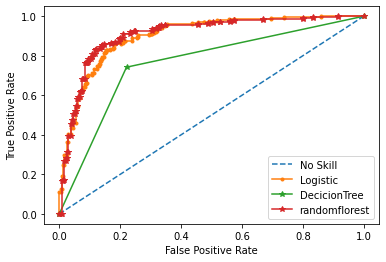

In [ ]:
#comparativo entre 3 modelos de ROC_CURVE

from sklearn.metrics import roc_curve


# roc curve and auc
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression





# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(trainX,trainy)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(trainX,trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)
tr_probs = tree_clf.predict_proba(testX)
rand_probs = rnd_clf.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
tr_probs = tr_probs[:,1]
rand_probs = rand_probs[:,1]


# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
tr_auc = roc_auc_score(testy, tr_probs) #DecicionTree
rndflorest_auc = roc_auc_score(testy, rand_probs) #randomflorest
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tr_auc)) #DecicionTree
print('RandonFlorest: ROC AUC=%.3f' % (rndflorest_auc)) #randomflorest

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
tr_fpr, tr_tpr, _ = roc_curve(testy, tr_probs) #DecicionTree
rndfl_fpr, rndfl_tpr, _ = roc_curve(testy, rand_probs) #randomflorest

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(tr_fpr, tr_tpr, marker='*', label='DecicionTree')
pyplot.plot(rndfl_fpr, rndfl_tpr, marker='*', label='randomflorest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Confusion Matrix

![meme confusion](https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg)

In [ ]:
from sklearn.metrics import confusion_matrix #trainX, testX, trainy, testy

confusion_matrix(pred_y, testy)
pd.crosstab(pred_y, testy, rownames=['True'], colnames=['Predicted'], margins=True)

#false positive ERROR T1
#False Negative ERROR T2

Predicted,0,1,All
True,,,
0,201,37,238
1,39,223,262
All,240,260,500


In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(pred_y, testy))
print('F1 score:', f1_score(testy, pred_y, average="macro"))
print('Precision:', precision_score(testy, pred_y, average="macro"))
print('Recall:', recall_score(testy, pred_y, average="macro"))
print('\n clasification report:\n', classification_report(testy, pred_y))

Accuracy: 0.85
F1 score: 0.8497349324207902
Precision: 0.8497972073935138
Recall: 0.8496794871794872

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       240
           1       0.85      0.86      0.86       260

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



# Aula 9 - Projeto DS



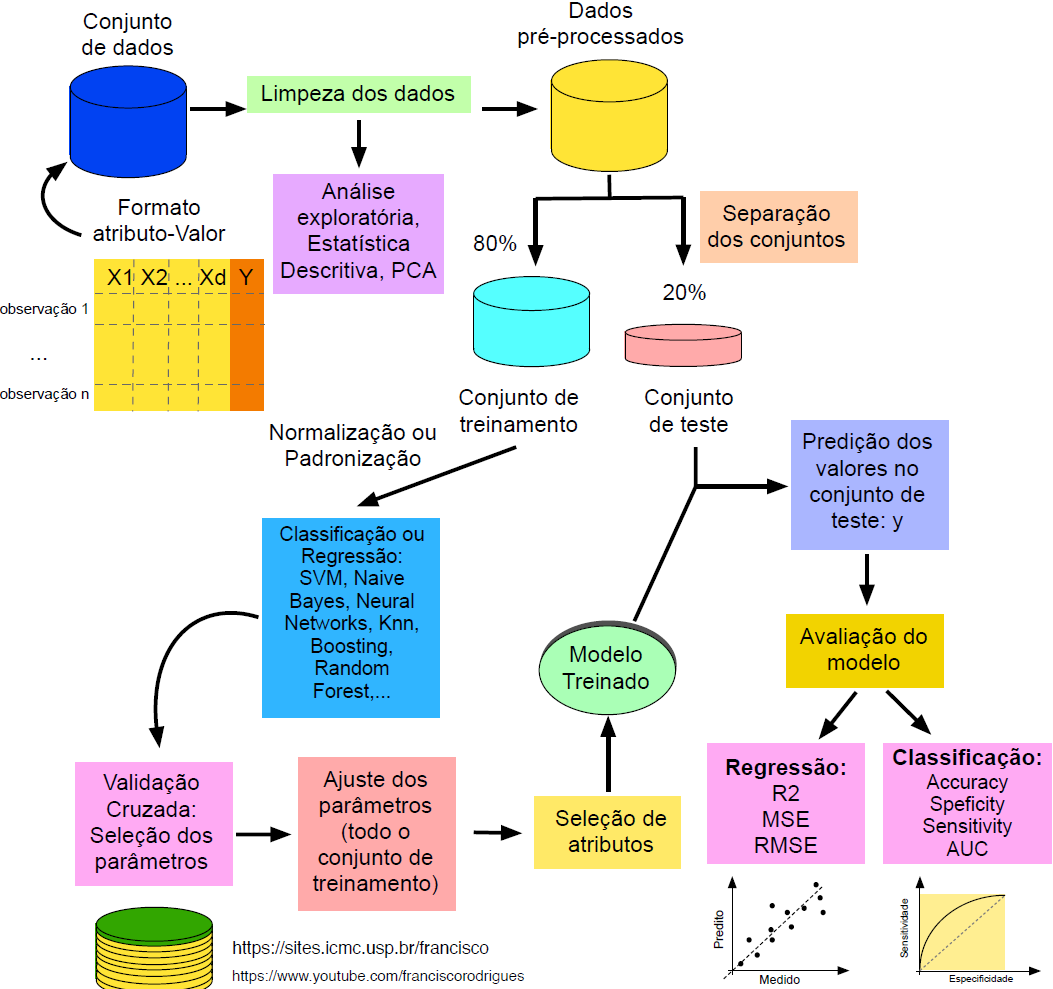